In [1]:
# General libraries
import os
import numpy as np
import pandas as pd 
import random
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
import os
from PIL import Image
import os
from skimage import io
from matplotlib import cm
from mpl_toolkits.axes_grid1 import ImageGrid
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Deep learning libraries
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import PIL



In [2]:
train_image = ImageDataGenerator(rescale=1/255, zoom_range=0.3, vertical_flip=True,validation_split=.2)
test_image = ImageDataGenerator(rescale=1/255)

In [38]:
 train_gen = train_image.flow_from_directory(
    directory='chest_xray/train', 
    target_size=(128, 128),color_mode='grayscale',
    batch_size=32, 
    class_mode='categorical', subset='training',
    shuffle=True)

Found 4192 images belonging to 3 classes.


In [39]:
val_gen = train_image.flow_from_directory(
    directory='chest_xray/train', 
    target_size=(128, 128),color_mode='grayscale',
    batch_size=32, 
    class_mode='categorical', subset='validation',
    shuffle=True)

Found 1046 images belonging to 3 classes.


In [40]:
test_gen = test_image.flow_from_directory(
    directory='chest_xray/test', 
    target_size=(128, 128),color_mode='grayscale', 
    batch_size=32, 
    class_mode='categorical',
    shuffle=True)

Found 624 images belonging to 3 classes.


In [41]:
print(train_gen)
print(len(train_gen))


131


In [42]:
train_gen

In [43]:
train_gen[0]

(array([[[[0.00392157],
          [0.00392157],
          [0.00392157],
          ...,
          [0.04313726],
          [0.04313726],
          [0.04313726]],
 
         [[0.00392157],
          [0.00392157],
          [0.00392157],
          ...,
          [0.04313726],
          [0.04313726],
          [0.04313726]],
 
         [[0.00392157],
          [0.00392157],
          [0.00392157],
          ...,
          [0.04313726],
          [0.04313726],
          [0.04313726]],
 
         ...,
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]]],
 
 
        [

In [44]:
X,y = next(train_gen)
print('x: ',type(X))
print('y: ',type(y))
print('x: ',X.shape)
print('y: ',y.shape)


x:  <class 'numpy.ndarray'>
y:  <class 'numpy.ndarray'>
x:  (32, 128, 128, 1)
y:  (32, 3)


In [45]:
model = models.Sequential()
model.add(layers.Conv2D(filters=10,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

results = model.fit(train_gen,epochs=2, batch_size=32,validation_data=val)

Epoch 1/2
131/131 [==============================] - 141s 1s/step - loss: 1.0776 - accuracy: 0.4814 - val_loss: 1.0558 - val_accuracy: 0.4847
Epoch 2/2
131/131 [==============================] - 182s 1s/step - loss: 1.0437 - accuracy: 0.4843 - val_loss: 1.0171 - val_accuracy: 0.4847


In [46]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 126, 126, 10)      100       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 63, 63, 10)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 61, 61, 4)         364       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 4)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 2)         74        
_________________________________________________________________
flatten_8 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 2)                

In [47]:
results.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x264a28f7c70>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [1.0776231288909912, 1.0437233448028564],
  'accuracy': [0.48139312863349915, 0.48425573110580444],
  'val_loss': [1.0558135509490967, 1.0171163082122803],
  'val_accuracy': [0.4847036302089691, 0.4847036302089691]},
 'params': {'verbose': 1, 'epochs': 2, 'steps': 131},
 'epoch': [0, 1]}

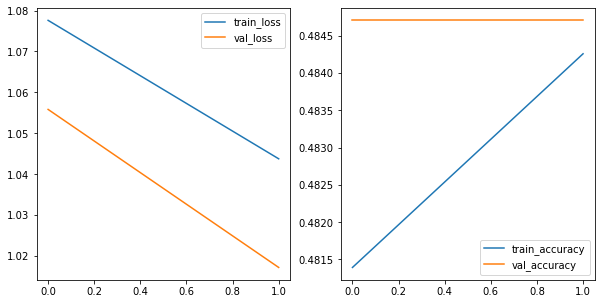

In [48]:
import seaborn as sns

train_loss = results.history['loss']
train_acc = results.history['accuracy']
val_loss = results.history['val_loss']
val_acc = results.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label='train_loss')
sns.lineplot(x=results.epoch, y=train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label='val_loss')
sns.lineplot(x=results.epoch, y=val_acc, ax=ax2, label='val_accuracy');

In [55]:
val_loss, val_acc = model.evaluate(val_gen[0], val_gen[1])


ValueError: in user code:

    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1174 test_step
        y_pred = self(x, training=False)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:155 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential_8 expects 1 inputs, but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(32, 128, 128, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(32, 3) dtype=float32>]


In [56]:
model.predict(test_gen[0])

ValueError: in user code:

    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:155 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential_8 expects 1 inputs, but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(32, 128, 128, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(32, 3) dtype=float32>]


In [57]:
model.predict(test_gen[0]).sum()

ValueError: in user code:

    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:155 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential_8 expects 1 inputs, but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(32, 128, 128, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(32, 3) dtype=float32>]


In [58]:
np.argmax(model.predict(test_gen[0]))

ValueError: in user code:

    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:155 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential_8 expects 1 inputs, but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(32, 128, 128, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(32, 3) dtype=float32>]


In [49]:
val_loss, val_acc = model.evaluate(val[0], val[1])


ValueError: in user code:

    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1174 test_step
        y_pred = self(x, training=False)
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:155 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential_8 expects 1 inputs, but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(32, 128, 128, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(32, 3) dtype=float32>]


In [ ]:
test_loss, test_acc = model.evaluate(test_gen[0], test_gen[1])